In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm
# e es la carga elemental, m_p es la masa del proton
from scipy.constants import e, m_p

In [2]:
num_particulas = int(input('Escriba el numero de partículas que desea simular:\n'))
max_vel = float(input('Escriba la velocidad máxima que una partícula puede tener:\n'))
magnitud_B = float(input('Escriba la magnitud del campo magnético:\n'))

Escriba el numero de partículas que desea simular:
10
Escriba la velocidad máxima que una partícula puede tener:
10
Escriba la magnitud del campo magnético:
101


### Condiciones iniciales

In [3]:
def momento_inicial(v_inicial, m_p):
    return np.linalg.norm(v_inicial)*m_p

In [4]:
def fuerza_y_aceleracion(q, v, B, m):
    # Fuerza magnetica
    F = q*np.cross(v, B)
    a = F/m
    return F, a

In [5]:
def mover_particula(dt, posicion_anterior, velocidad_anterior, aceleracion_anterior):
    posicion_actual = posicion_anterior + velocidad_anterior*dt + 0.5*aceleracion_anterior*(dt**2)
    velocidad_actual = velocidad_anterior + aceleracion_anterior*dt
    return posicion_actual, velocidad_actual

In [6]:
def evolucionar_verlet(e, m_p, B, delta_t, posicion_inicial, v_inicial, aceleracion_inicial):
    trayectoria = np.array(posicion_inicial)
    velocidad = np.array(v_inicial)
    aceleracion = np.array(aceleracion_inicial)
    F_1, a_1 = fuerza_y_aceleracion(e, v_inicial, B, m_p)
    pos_1, v_1 = mover_particula(delta_t, posicion_inicial, v_inicial, a_1)
    trayectoria = np.append(trayectoria, pos_1, axis=0)
    velocidad = np.append(velocidad, v_1, axis=0)
    aceleracion = np.append(aceleracion, a_1, axis=0)
    y = pos_1[:,1]
    i = 1
    t = 0.0
    while y >= 0:
        f, a = fuerza_y_aceleracion(e, velocidad[i], B, m_p)
        pos, v = mover_particula(delta_t, trayectoria[i], velocidad[i], a)
        trayectoria = np.append(trayectoria, pos, axis=0)
        velocidad = np.append(velocidad, v, axis=0)
        aceleracion = np.append(aceleracion, a, axis=0)
        i += 1
        t += delta_t
        y = pos[:,1]
    return trayectoria, velocidad, aceleracion

In [7]:
def momento_final(trayectoria, e, B):
    R = trayectoria[-1,0]/2
    return R*e*np.linalg.norm(B)

5.317481803155029 5.4248666655179205
19.307803315488133 19.69771829372714
15.606325008577102 15.921489803695401
8.049018118257827 8.211565492143096
5.11822866938763 5.221589677765295
12.50858824954193 12.76119523105227
0.4956157424301644 0.5056245455170255
0.4509806230724922 0.46008803404816045
8.129097876021232 8.29326243527427
14.46300669487238 14.755082538434449


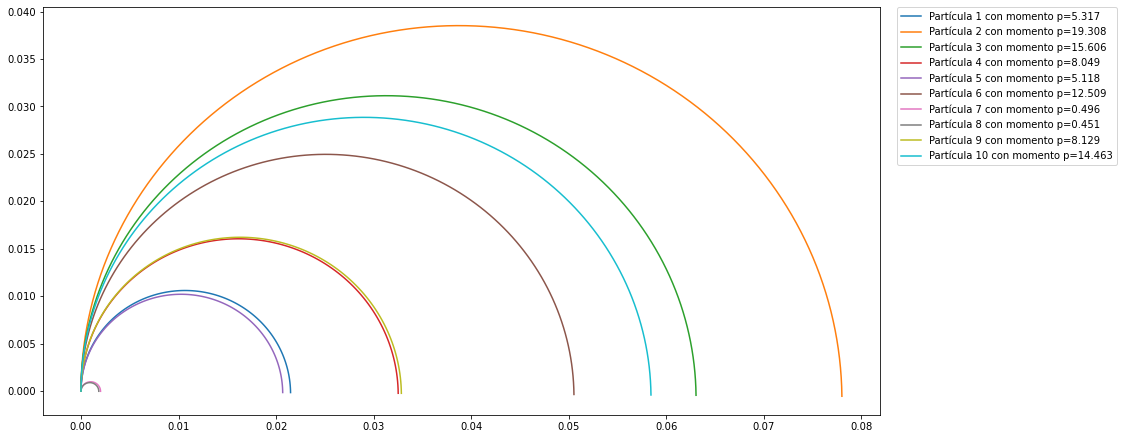

In [11]:
B = np.array([[0.0, 0.0, magnitud_B]])
posicion_inicial = np.array([[0.0, 0.0, 0.0]])
a_inicial = np.array([[0.0, 0.0, 0.0]])
t_inicial = 0
delta_t = 0.0001
e = 5
m_p = 2
plt.figure(figsize=(15,7.5))
for p in range(num_particulas):
    v_inicial = np.array([[0.0, max_vel*np.random.rand(), 0.0]])
    p_inicial = momento_inicial(v_inicial, m_p)
    trayectoria, velocidad, aceleracion = evolucionar_verlet(e, m_p, B, delta_t, posicion_inicial, v_inicial, a_inicial)
    p_final = momento_final(trayectoria, e, B)
    plt.plot(trayectoria[:,0], trayectoria[:,1], label='Partícula {} con momento p={:.3f}'.format(p+1, p_inicial))
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    print(p_inicial, p_final)